In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [6]:
import scipy.stats

Implement the function below to calculate the event probabilities $P(A)$, $P(B)$, $P(A \cap B)$ and the conditional probabilities $P(A\mid B)$, $P(B\mid A)$ for an arbitrary (finite) probability space specified by each outcome's probability. *Hint: the probability of an event containing a set of outcomes is just the sum of the individual outcome probabilities.*

In [4]:
def calculate_probabilities(p, A, B):
    # Checking that all elements in p are valid (between 0 and 1 only).
    assert np.all((p >= 0) & (p <= 1))     
    #Ensures that the sum of all probabilities p is close to 1, 
    assert np.isclose(np.sum(p), 1)  
    # Probability of event A
    P_A = np.sum(p[A])
    # Probability of event B
    P_B = np.sum(p[B])
    # Probability of A intersect B
    P_A_and_B = np.sum(p[A & B])
    # Conditional probability P(A | B)
    if P_B != 0:
        P_A_given_B = P_A_and_B / P_B 
    else:
        P_A_given_B=0
    # Conditional probability P(B | A)
    if P_A != 0:
        P_B_given_A = P_A_and_B / P_A
    else: 
        P_B_given_A=0
    return (P_A, P_B, P_A_and_B, P_A_given_B, P_B_given_A)

In [10]:
# using the code in the questions, added printing arguments to test my code. 

# A correction solution should pass the tests below.
gen = np.random.RandomState(seed=123)
N = 100
p = gen.uniform(size=(4, N))
p = (p / p.sum(axis=1).reshape(-1, 1)).reshape(-1) / 4.

# Test when A and B are "independent" events, i.e., P(A intersect B) = P(A) P(B).
A = np.arange(4 * N) < 2 * N
B = (np.arange(4 * N) >= N) & (np.arange(4 * N) < 3 * N)

result1 = calculate_probabilities(p, A, B)
print("Test 1 Results (Independent Events):", np.round(result1, 3))
assert np.allclose(
    np.round(result1, 3),
    [0.5, 0.5, 0.25, 0.5, 0.5])

# Test with randomly generated events A, B.
A = gen.uniform(size=4*N) < 0.3
B = gen.uniform(size=4*N) > 0.6

result2 = calculate_probabilities(p, A, B) #    
print("Test 2 Results (Randomly Generated Events):", np.round(result2, 3))
assert np.allclose(
    np.round(result2, 3),
    [0.278, 0.33, 0.076, 0.23, 0.273])

Test 1 Results (Independent Events): [0.5  0.5  0.25 0.5  0.5 ]
Test 2 Results (Randomly Generated Events): [0.278 0.33  0.076 0.23  0.273]


The cumulative distribution function (CDF) is the fundamental representation of a random variable, rather than the probability density function (PDF) which might not be defined, is not a probability and generally has dimensions. In this problem, you will explore a practical application of the CDF for generating random numbers.

Since the CDF $y = F_X(x)$ maps from random variable values to the range $[0,1]$, its inverse $x = F_X^{-1}(y)$ maps from $[0,1]$ back to the random variable. What distribution of $y$ values would generate values according to the PDF $f_X(x)$ when transformed by the inverse $F_X^{-1}(y)$? The answer is a uniform distribution, as we can demonstrate numerically for an arbitrary random variable:

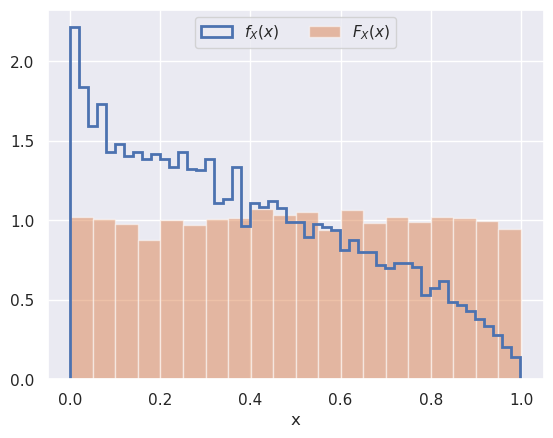

In [44]:
def cdf_hist(X, n=10000, seed=123):
    gen = np.random.RandomState(seed=seed)
    # Generate n random value from the scipy.stats distribution X.
    x = X.rvs(n, random_state=gen)
    plt.hist(x, bins=50, label='$f_X(x)$', histtype='step', lw=2, density=True, stacked=True)
    # Histogram the corresponding CDF values.
    y = X.cdf(x)
    plt.hist(y, bins=20, label='$F_X(x)$', alpha=0.5, density=True, stacked=True)
    plt.xlabel('x')
    plt.legend(loc='upper center', ncol=2)
    
cdf_hist(scipy.stats.beta(0.9, 1.5))

When the function $F_X(x)$ can be inverted analytically, you can use it to transform uniformly generated random values into a random sampling of the PDF $f_X(x)$.

For example, consider random outcomes consisting of $(x,y)$ points uniformly distributed on the disk,
$$
0 \le r_1 \le \sqrt{x^2 + y^2} \le r_2 \; .
$$
The CDF of the random variable $r \equiv \sqrt{x^2 + y^2}$ is then
$$
F_R(r) = \begin{cases}
1 & r > r_2 \\
\frac{r^2 - r_1^2}{r_2^2 - r_1^2} & r_1 \le r \le r_2 \\
0 & r < r_1
\end{cases}\; .
$$
Implement the function below to apply $F_R^{-1}(y)$ to uniformly distributed random values in order to sample $f_R(x)$:

In [7]:
def sample_disk(r1, r2, n, gen): # r1 is the inner radius, r2 is the outer radius, n is the number of samples, gen is the random number generator.

    assert (r1 >= 0) and (r1 < r2) # r1 must be non-negative and less than r2.
    
    u = gen.uniform(size=n) #   Generate n random values from a uniform distribution.

    r = np.sqrt(r1**2 + u * (r2**2 - r1**2)) #  Compute the radius of the points.
    
    return r

In [17]:
# A correct solution should pass these tests.
r1, r2, n = 1., 2., 1000
gen = np.random.RandomState(seed=123)
r = sample_disk(r1, r2, n, gen)
print("Test 1 Results:")
print(f"Min r: {np.min(r)}, Max r: {np.max(r)}")
print(f"Mean r: {np.round(np.mean(r), 3)}, Expected: 1.556")
print(f"Standard Deviation r: {np.round(np.std(r), 3)}, Expected: 0.279")
assert np.all((r >= r1) & (r <= r2))
assert np.allclose(np.round(np.mean(r), 3), 1.556)
assert np.allclose(np.round(np.std(r), 3), 0.279)

print("\n") 

r1, r2, n = 0., 2., 1000
r = sample_disk(r1, r2, n, gen)
print("Test 2 Results:")
print(f"Min r: {np.min(r)}, Max r: {np.max(r)}")
print(f"Mean r: {np.round(np.mean(r), 3)}, Expected: 1.325")
print(f"Standard Deviation r: {np.round(np.std(r), 3)}, Expected: 0.494")
assert np.all((r >= r1) & (r <= r2))
assert np.allclose(np.round(np.mean(r), 3), 1.325)
assert np.allclose(np.round(np.std(r), 3), 0.494)


Test 1 Results:
Min r: 1.000122823877649, Max r: 1.9991886399032965
Mean r: 1.556, Expected: 1.556
Standard Deviation r: 0.279, Expected: 0.279


Test 2 Results:
Min r: 0.021918164975645173, Max r: 1.9996442191665256
Mean r: 1.325, Expected: 1.325
Standard Deviation r: 0.494, Expected: 0.494


Test your implementation by plotting some $(x,y)$ points with uniformly random $0 \le \theta < 2\pi$:

(-1.3163449251403394,
 1.3060773155580458,
 -1.310787832985274,
 1.3116907020378132)

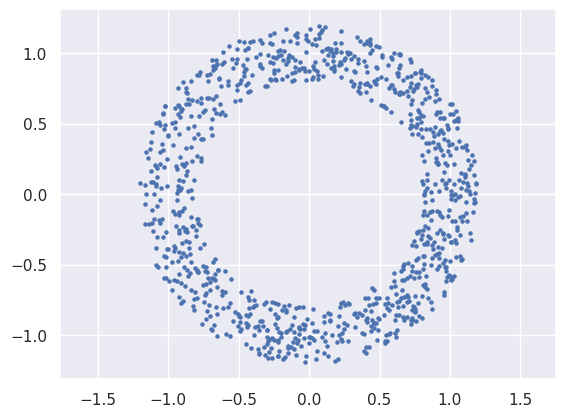

In [11]:
gen = np.random.RandomState(seed=123) # Seed for reproducibility
r = sample_disk(0.8, 1.2, 1000, gen) # Sample 1000 points
theta = gen.uniform(0, 2 * np.pi, size=len(r))  # Generate random angles between 0 and 2pi
plt.scatter(r * np.cos(theta), r * np.sin(theta), s=5) # The points
plt.gca() # can tweak the plot to make the circle look like a circle. aspectratio=1 let's try:
plt.axis('equal') 

Sometimes $F_X(x)$ cannot be inverted explicitly, either because the inverse has no closed form or because the underlying distribution is arbitrary.  In these cases, we can still apply the same method numerically.

Implement the function below to tabulate an empirical estimate of the CDF for an arbitrary random variable, as:
$$
x_{CDF} = x_{\text{lo}}, x_0, x_1, \ldots, x_{N-1}, x_{\text{hi}} \; ,
$$
where the $x_i$ are [sorted](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html), $x_0 \le x_1 \le \ldots \le x_{N-1}$, and corresponding CDF values:
$$
y_{CDF} = 0, \frac{1}{N+1}, \frac{2}{N+1}, \ldots, \frac{N}{N+1}, 1 \; .
$$

In [12]:

def empirical_cdf(x, xlo, xhi): # x is the data, xlo and xhi are the lower and upper bounds
    assert xlo < xhi # Ensure that the lower bound is less than the upper bound
    x = np.asarray(x) # Convert x to a numpy array
    assert np.all((x >= xlo) & (x <= xhi)) # Ensure that all values in x are within the bounds

    sorted_x = np.sort(x) # Sort the data
    
    N = len(sorted_x) # Number of samples
    
    # Create y values for empirical CDF
    y_cdf = np.linspace(0, 1, N+2)  # 0 to 1
    y_cdf[1:-1] = np.arange(1, N+1) / (N + 1)   # 1/N to 1-1/N

    # Create x values for empirical CDF, including boundary points
    x_cdf = np.concatenate([[xlo], sorted_x, [xhi]]) 

    return x_cdf, y_cdf

In [13]:
# A correct solution should pass these tests.
x_cdf, y_cdf = empirical_cdf([1, 2, 3, 4], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

x_cdf, y_cdf = empirical_cdf([4, 2, 1, 3], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

gen = np.random.RandomState(seed=123)
x = scipy.stats.beta(0.9, 1.5).rvs(size=4, random_state=gen)
x_cdf, y_cdf = empirical_cdf(x, 0., 1.)
assert np.allclose(
    np.round(x_cdf, 3),
    [ 0.   ,  0.087,  0.152,  0.42 ,  0.721,  1.   ])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

Test your implementation by generating CDF samples matched to an unknown distribution.  Note that we use [linear interpolation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html) to numerically invert the empirical CDF in this approach, which is a useful trick to remember:

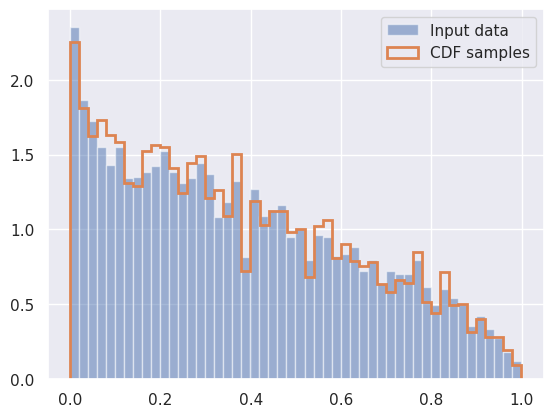

In [14]:
n = 5000 # Number of samples
gen = np.random.RandomState(seed=123) # Seed for reproducibility
X = scipy.stats.beta(0.9, 1.5) #    Beta distribution
# Generate samples using scipy.stats
x_in = X.rvs(n, random_state=gen) # Generate n samples
plt.hist(x_in, bins=50, label='Input data', alpha=0.5, density=True, stacked=True) # Plot the histogram
# Generate samples using the empirical CDF of x_in
x_cdf, y_cdf = empirical_cdf(x_in, 0., 1.) #    Empirical CDF
y = gen.uniform(size=n) #   Uniform random numbers
x = np.interp(y, y_cdf, x_cdf) #    Interpolation
plt.hist(x, bins=50, label='CDF samples', histtype='step', lw=2, density=True, stacked=True) #  Plot the histogram
plt.legend();

The normal (aka Gaussian) distribution is one of the fundamental probability densities that we will encounter often.

Implement the function below using `np.random.multivariate_normal` to generate random samples from an arbitrary multidimensional normal distribution, for a specified random seed:

In [15]:
import numpy as np

def generate_normal(mu, C, n, seed=123):
    
    assert len(mu.shape) == 1, 'mu must be 1D.'
    assert C.shape == (len(mu), len(mu)), 'C must be N x N.'
    assert np.all(np.linalg.eigvals(C) > 0), 'C must be positive definite.'
    
    # Set the seed for reproducibility
    np.random.seed(seed)
    
    # Generate samples
    samples = np.random.multivariate_normal(mu, C, n)
    
    return samples


In [16]:
# A correct solution should pass these tests.
mu = np.array([-1., 0., +1.])
C = np.identity(3)
C[0, 1] = C[1, 0] = -0.9
Xa = generate_normal(mu, C, n=500, seed=1)
Xb = generate_normal(mu, C, n=500, seed=1)
Xc = generate_normal(mu, C, n=500, seed=2)
assert np.array_equal(Xa, Xb)
assert not np.array_equal(Xb, Xc)
X = generate_normal(mu, C, n=2000, seed=3)
assert np.allclose(np.mean(X, axis=0), mu, rtol=0.001, atol=0.1)
assert np.allclose(np.cov(X, rowvar=False), C, rtol=0.001, atol=0.1)

In [19]:
# A correct solution should pass these tests.
mu = np.array([-1., 0., +1.])
C = np.identity(3)
C[0, 1] = C[1, 0] = -0.9
Xa = generate_normal(mu, C, n=500, seed=1)
Xb = generate_normal(mu, C, n=500, seed=1)
Xc = generate_normal(mu, C, n=500, seed=2)

print("Test 1: Reproducibility check with same seed")
print("Xa shape:", Xa.shape)
print("Xb shape:", Xb.shape)
print("Xa and Xb are equal:", np.array_equal(Xa, Xb))

print("\nTest 2: Different results with different seeds")
print("Xb and Xc are not equal:", not np.array_equal(Xb, Xc))
print("\n")
X = generate_normal(mu, C, n=2000, seed=3)
print("Test 3: Mean and Covariance check")
print("Mean of X:", np.round(np.mean(X, axis=0), 3))
print("Expected mean:", mu)
print("Covariance of X:\n", np.round(np.cov(X, rowvar=False), 3))
print("Expected covariance:\n", C)

assert np.array_equal(Xa, Xb)
assert not np.array_equal(Xb, Xc)
assert np.allclose(np.mean(X, axis=0), mu, rtol=0.001, atol=0.1)
assert np.allclose(np.cov(X, rowvar=False), C, rtol=0.001, atol=0.1)


Test 1: Reproducibility check with same seed
Xa shape: (500, 3)
Xb shape: (500, 3)
Xa and Xb are equal: True

Test 2: Different results with different seeds
Xb and Xc are not equal: True


Test 3: Mean and Covariance check
Mean of X: [-0.97  -0.051  0.979]
Expected mean: [-1.  0.  1.]
Covariance of X:
 [[ 0.968 -0.879  0.015]
 [-0.879  0.986 -0.03 ]
 [ 0.015 -0.03   1.009]]
Expected covariance:
 [[ 1.  -0.9  0. ]
 [-0.9  1.   0. ]
 [ 0.   0.   1. ]]


Visualize a generated 3D dataset using:

In [20]:
def visualize_3d(): 
    mu = np.array([-1., 0., +1.]) # Mean
    C = np.identity(3) # Identity matrix
    C[0, 1] = C[1, 0] = -0.9 
    X = generate_normal(mu, C, n=2000, seed=3)
    df = pd.DataFrame(X, columns=('x0', 'x1', 'x2'))
    sns.pairplot(df)

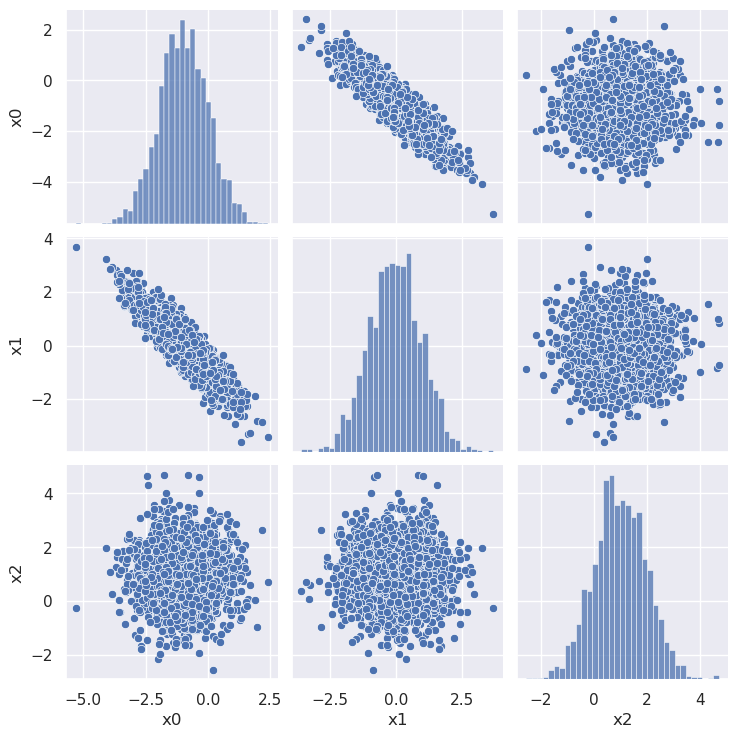

In [37]:
visualize_3d()

Read about [correlation and covariance](https://en.wikipedia.org/wiki/Covariance_and_correlation), then implement the function below to create a 2x2 covariance matrix given values of $\sigma_x$, $\sigma_y$ and the correlation coefficient $\rho$:

In [21]:

def create_2d_covariance(sigma_x, sigma_y, rho):

    assert (sigma_x > 0) and (sigma_y > 0), 'sigmas must be > 0.'
    assert -1 <= rho <= 1, 'rho must be between -1 and 1 inclusive.'
    
    # Construct the covariance matrix
    covariance = np.array([
        [sigma_x**2, sigma_x * sigma_y * rho],
        [sigma_x * sigma_y * rho, sigma_y**2]
    ])
    
    return covariance

In [22]:
# A correct solution should pass these tests.
assert np.array_equal(create_2d_covariance(1., 1.,  0.0), [[1.,  0.], [ 0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1.,  0.0), [[4.,  0.], [ 0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1.,  0.5), [[4.,  1.], [ 1., 1.]])
assert np.array_equal(create_2d_covariance(2., 1., -0.5), [[4., -1.], [-1., 1.]])

In [23]:
# A correct solution should pass these tests.
print("Test 1: No correlation, equal variances:")
print("Result:", create_2d_covariance(1., 1.,  0.0))
assert np.array_equal(create_2d_covariance(1., 1.,  0.0), [[1.,  0.], [ 0., 1.]])
print("Test passed:", np.array_equal(create_2d_covariance(1., 1.,  0.0), [[1.,  0.], [ 0., 1.]]))

print("\nTest 2: No correlation, different variances:")
print("Result:", create_2d_covariance(2., 1.,  0.0))
assert np.array_equal(create_2d_covariance(2., 1.,  0.0), [[4.,  0.], [ 0., 1.]])
print("Test passed:", np.array_equal(create_2d_covariance(2., 1.,  0.0), [[4.,  0.], [ 0., 1.]]))

print("\nTest 3: Positive correlation:")
print("Result:", create_2d_covariance(2., 1.,  0.5))
assert np.array_equal(create_2d_covariance(2., 1.,  0.5), [[4.,  1.], [ 1., 1.]])
print("Test passed:", np.array_equal(create_2d_covariance(2., 1.,  0.5), [[4.,  1.], [ 1., 1.]]))

print("\nTest 4: Negative correlation:")
print("Result:", create_2d_covariance(2., 1., -0.5))
assert np.array_equal(create_2d_covariance(2., 1., -0.5), [[4., -1.], [-1., 1.]])
print("Test passed:", np.array_equal(create_2d_covariance(2., 1., -0.5), [[4., -1.], [-1., 1.]]))


Test 1: No correlation, equal variances:
Result: [[1. 0.]
 [0. 1.]]
Test passed: True

Test 2: No correlation, different variances:
Result: [[4. 0.]
 [0. 1.]]
Test passed: True

Test 3: Positive correlation:
Result: [[4. 1.]
 [1. 1.]]
Test passed: True

Test 4: Negative correlation:
Result: [[ 4. -1.]
 [-1.  1.]]
Test passed: True


Run the following cell that uses your `create_2d_covariance` and `generate_normal` functions to compare the 2D normal distributions with $\rho = 0$ (blue), $\rho = +0.9$ (red) and $\rho = -0.9$ (green):

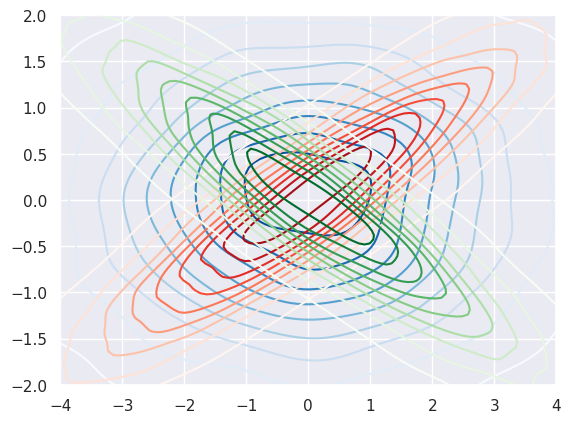

In [26]:
def compare_rhos(): # Function to compare different correlation coefficients
    mu = np.zeros(2) # Mean
    sigma_x, sigma_y = 2., 1. # Standard deviations
    for rho, cmap in zip((0., +0.9, -0.9), ('Blues', 'Reds', 'Greens')): # Different correlation coefficients . Blue is 0, Red is +0.9, Green is -0.9
        C = create_2d_covariance(sigma_x, sigma_y, rho) # Covariance matrix
        X = generate_normal(mu, C, 10000) # Generate samples
        sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap=cmap) #  Plot the KDE
    plt.xlim(-4, +4) #  Set the x-axis limits
    plt.ylim(-2, +2) #  Set the y-axis limits

compare_rhos()